In [49]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

# Load the Excel file
file_path = "log_evaluations.xlsx"  # Replace with your actual file path
df = pd.read_excel("log_evaluations.xlsx")

In [50]:
# all values in Model column to lowercase
df['Model'] = df['Model'].str.lower()
# Define the renaming function
def rename_model(model_name):
    model_name = re.sub(r'^llama-3-8b', 'llama3:8b', model_name)
    model_name = re.sub(r'^llama3:8b-bnb', 'llama3:8b-text-bnb', model_name)
    model_name = re.sub(r'^phi-3', 'phi3:14b', model_name)
    return model_name

# Apply the renaming function to the 'Model' column
df['Model'] = df['Model'].apply(rename_model)

df.head(20)

,Model,Evaluator Model,Random Seed,Number of Samples,Total Time,Test Match Time,Test Match Scores,Test Match Results,Test Correctness Time,Test Correctness Scores,...,Test Match Time - LabeledFewShot,Test Match Scores - LabeledFewShot,Test Match Results - LabeledFewShot,Test Correctness Time - LabeledFewShot,Test Correctness Scores - LabeledFewShot,Test Correctness Results - LabeledFewShot,Test Executable Time - LabeledFewShot,Test Executable Scores - LabeledFewShot,Test Executable Results - LabeledFewShot,Test Combined Scores - LabeledFewShot
0,mistral:7b-instruct-v0.3-q5_k_m,llama3:70b,10,200,4272.73,661.48,0.35000,logs\mistral_7b_instruct_v0.3_q5_K_M_llama3_70...,661.48,0.93750,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,mistral:7b-instruct-v0.3-q5_k_m,llama3:70b,100,400,2613.92,1311.94,0.30625,logs\mistral_7b_instruct_v0.3_q5_K_M_llama3_70...,1311.94,0.91250,...,1301.98,0.28750,logs\mistral_7b_instruct_v0.3_q5_K_M_llama3_70...,1301.98,0.82500,logs\mistral_7b_instruct_v0.3_q5_K_M_llama3_70...,1301.98,0.82500,logs\mistral_7b_instruct_v0.3_q5_K_M_llama3_70...,0.0
2,llama3:8b-text-bnb-4bit-synthetic_text_to_sql-...,llama3:70b,100,400,3073.17,1692.43,0.30000,logs\llama_3_8b_bnb_4bit_synthetic_text_to_sql...,1692.43,0.77500,...,1380.74,0.28125,logs\llama_3_8b_bnb_4bit_synthetic_text_to_sql...,1380.74,0.74375,logs\llama_3_8b_bnb_4bit_synthetic_text_to_sql...,1380.74,0.78750,logs\llama_3_8b_bnb_4bit_synthetic_text_to_sql...,0.0
3,llama3:8b-instruct-bnb-4bit-synthetic_text_to_...,llama3:70b,100,400,2571.26,1280.16,0.31875,logs\llama_3_8b_Instruct_bnb_4bit_synthetic_te...,1280.16,0.80000,...,1291.10,0.31875,logs\llama_3_8b_Instruct_bnb_4bit_synthetic_te...,1291.10,0.79375,logs\llama_3_8b_Instruct_bnb_4bit_synthetic_te...,1291.10,0.92500,logs\llama_3_8b_Instruct_bnb_4bit_synthetic_te...,0.0
4,phi3:14b-medium-4k-instruct-synthetic_text_to_...,llama3:70b,100,400,2738.42,1390.61,0.26875,logs\Phi_3_medium_4k_instruct_synthetic_text_t...,1390.61,0.76250,...,1347.81,0.26875,logs\Phi_3_medium_4k_instruct_synthetic_text_t...,1347.81,0.74375,logs\Phi_3_medium_4k_instruct_synthetic_text_t...,1347.81,0.86250,logs\Phi_3_medium_4k_instruct_synthetic_text_t...,0.0
5,phi3:14b-medium-4k-instruct-q5_k_m,llama3:70b,100,400,2646.61,1319.24,0.30625,logs\phi3_14b_medium_4k_instruct_q5_K_M_llama3...,1319.24,0.94375,...,1327.37,0.30000,logs\phi3_14b_medium_4k_instruct_q5_K_M_llama3...,1327.37,0.87500,logs\phi3_14b_medium_4k_instruct_q5_K_M_llama3...,1327.37,0.89375,logs\phi3_14b_medium_4k_instruct_q5_K_M_llama3...,0.0
6,llama3:8b-text-q5_k_m,llama3:70b,100,400,3485.83,1662.06,0.10625,logs\llama3_8b_text_q5_K_M_llama3_70b_100_400_...,1662.06,0.50625,...,1823.76,0.10000,logs\llama3_8b_text_q5_K_M_llama3_70b_100_400_...,1823.76,0.53125,logs\llama3_8b_text_q5_K_M_llama3_70b_100_400_...,1823.76,0.09375,logs\llama3_8b_text_q5_K_M_llama3_70b_100_400_...,0.0
7,llama3:8b-instruct-q5_k_m,llama3:70b,100,400,2612.39,1290.58,0.28750,logs\llama3_8b_instruct_q5_K_M_llama3_70b_100_...,1290.58,0.94375,...,1321.81,0.26875,logs\llama3_8b_instruct_q5_K_M_llama3_70b_100_...,1321.81,0.86875,logs\llama3_8b_instruct_q5_K_M_llama3_70b_100_...,1321.81,0.89375,logs\llama3_8b_instruct_q5_K_M_llama3_70b_100_...,0.0
8,command-r,llama3:70b,100,400,2709.84,1335.52,0.28125,logs\command_r_llama3_70b_100_400_test_match.txt,1335.52,0.90625,...,1374.32,0.31250,logs\command_r_llama3_70b_100_400_test_fewshot...,1374.32,0.88750,logs\command_r_llama3_70b_100_400_test_fewshot...,1374.32,0.92500,logs\command_r_llama3_70b_100_400_test_fewshot...,0.0
9,aya:35b,llama3:70b,100,400,2695.80,1345.42,0.28125,logs\aya_35b_llama3_70b_100_400_test_match.txt,1345.42,0.87500,...,1350.38,0.28750,logs\aya_35b_llama3_70b_100_400_test_fewshot_m...,1350.38,0.85000,logs\aya_35b_llama3_70b_100_400_test_fewshot_c...,1350.38,0.93750,logs\aya_35b_llama3_70b_100_400_test_fewshot_e...,0.0


In [51]:
# remove first row
df = df.iloc[1:]

In [52]:
# select only model columns starting with phi* and llama*
# df = df[df['Model'].str.startswith('phi') | df['Model'].str.startswith('llama')]

In [53]:
# Calculate combined scores and round to two decimal places
df['Test Combined Scores'] = df[['Test Correctness Scores', 'Test Executable Scores']].mean(axis=1).round(4)
df['Test Combined Scores - LabeledFewShot'] = df[['Test Correctness Scores - LabeledFewShot', 'Test Executable Scores - LabeledFewShot']].mean(axis=1).round(4)
# df['Test Combined Scores - BootstrapFewShot'] = df[['Test Match Scores - BootstrapFewShot', 'Test Correctness Scores - BootstrapFewShot', 'Test Executable Scores - BootstrapFewShot']].mean(axis=1).round(4)


In [54]:
df.head(3)

,Model,Evaluator Model,Random Seed,Number of Samples,Total Time,Test Match Time,Test Match Scores,Test Match Results,Test Correctness Time,Test Correctness Scores,...,Test Match Time - LabeledFewShot,Test Match Scores - LabeledFewShot,Test Match Results - LabeledFewShot,Test Correctness Time - LabeledFewShot,Test Correctness Scores - LabeledFewShot,Test Correctness Results - LabeledFewShot,Test Executable Time - LabeledFewShot,Test Executable Scores - LabeledFewShot,Test Executable Results - LabeledFewShot,Test Combined Scores - LabeledFewShot
1,mistral:7b-instruct-v0.3-q5_k_m,llama3:70b,100,400,2613.92,1311.94,0.30625,logs\mistral_7b_instruct_v0.3_q5_K_M_llama3_70...,1311.94,0.9125,...,1301.98,0.28750,logs\mistral_7b_instruct_v0.3_q5_K_M_llama3_70...,1301.98,0.82500,logs\mistral_7b_instruct_v0.3_q5_K_M_llama3_70...,1301.98,0.8250,logs\mistral_7b_instruct_v0.3_q5_K_M_llama3_70...,0.8250
2,llama3:8b-text-bnb-4bit-synthetic_text_to_sql-...,llama3:70b,100,400,3073.17,1692.43,0.30000,logs\llama_3_8b_bnb_4bit_synthetic_text_to_sql...,1692.43,0.7750,...,1380.74,0.28125,logs\llama_3_8b_bnb_4bit_synthetic_text_to_sql...,1380.74,0.74375,logs\llama_3_8b_bnb_4bit_synthetic_text_to_sql...,1380.74,0.7875,logs\llama_3_8b_bnb_4bit_synthetic_text_to_sql...,0.7656
3,llama3:8b-instruct-bnb-4bit-synthetic_text_to_...,llama3:70b,100,400,2571.26,1280.16,0.31875,logs\llama_3_8b_Instruct_bnb_4bit_synthetic_te...,1280.16,0.8000,...,1291.10,0.31875,logs\llama_3_8b_Instruct_bnb_4bit_synthetic_te...,1291.10,0.79375,logs\llama_3_8b_Instruct_bnb_4bit_synthetic_te...,1291.10,0.9250,logs\llama_3_8b_Instruct_bnb_4bit_synthetic_te...,0.8594


In [55]:
# filter models with les than 100 "Number of Samples"
df = df[df["Number of Samples"] > 100]

In [56]:
# sort the data by model name
df = df.sort_values(by='Model')

In [57]:
# Select the first 5 columns
first_five_columns = df.iloc[:, :5]

# Select columns with "Scores" and "Test" in their name after the first 5 columns
scores_test_columns = df.loc[:, [col for col in df.columns[5:] if 'Scores' in col and 'Test' in col and not 'BootstrapFewShot' in col ]]


# Combine the first 5 columns with the selected "Scores" columns
result_df = pd.concat([first_five_columns, scores_test_columns], axis=1)

result_df.head(10)

,Model,Evaluator Model,Random Seed,Number of Samples,Total Time,Test Match Scores,Test Correctness Scores,Test Executable Scores,Test Combined Scores,Test Match Scores - LabeledFewShot,Test Correctness Scores - LabeledFewShot,Test Executable Scores - LabeledFewShot,Test Combined Scores - LabeledFewShot
9,aya:35b,llama3:70b,100,400,2695.80,0.28125,0.87500,0.93125,0.9031,0.28750,0.85000,0.93750,0.8938
12,codegemma:7b-code-fp16,llama3:70b,100,400,3991.24,0.23125,0.68125,0.42500,0.5531,0.33125,0.88125,0.25000,0.5656
8,command-r,llama3:70b,100,400,2709.84,0.28125,0.90625,0.94375,0.9250,0.31250,0.88750,0.92500,0.9062
13,gpt-3.5-turbo,llama3:70b,100,400,2519.14,0.36250,0.96250,0.99375,0.9781,0.42500,0.94375,0.98125,0.9625
3,llama3:8b-instruct-bnb-4bit-synthetic_text_to_...,llama3:70b,100,400,2571.26,0.31875,0.80000,0.91250,0.8562,0.31875,0.79375,0.92500,0.8594
11,llama3:8b-instruct-fp16,llama3:70b,100,400,2657.96,0.30000,0.92500,0.93750,0.9312,0.26250,0.84375,0.93125,0.8875
7,llama3:8b-instruct-q5_k_m,llama3:70b,100,400,2612.39,0.28750,0.94375,0.95625,0.9500,0.26875,0.86875,0.89375,0.8812
2,llama3:8b-text-bnb-4bit-synthetic_text_to_sql-...,llama3:70b,100,400,3073.17,0.30000,0.77500,0.45625,0.6156,0.28125,0.74375,0.78750,0.7656
15,llama3:8b-text-bnb-4bit-synthetic_text_to_sql-...,llama3:70b,50,400,2827.33,0.32500,0.61875,0.47500,0.5469,0.27500,0.78750,0.87500,0.8312
6,llama3:8b-text-q5_k_m,llama3:70b,100,400,3485.83,0.10625,0.50625,0.45625,0.4812,0.10000,0.53125,0.09375,0.3125


In [58]:
# sort by Test Executable Scores
result_df.sort_values(by='Test Executable Scores', ascending=False, inplace=True)
# sort them only for head()
result_df.head(5)

,Model,Evaluator Model,Random Seed,Number of Samples,Total Time,Test Match Scores,Test Correctness Scores,Test Executable Scores,Test Combined Scores,Test Match Scores - LabeledFewShot,Test Correctness Scores - LabeledFewShot,Test Executable Scores - LabeledFewShot,Test Combined Scores - LabeledFewShot
13,gpt-3.5-turbo,llama3:70b,100,400,2519.14,0.36250,0.96250,0.99375,0.9781,0.42500,0.94375,0.98125,0.9625
7,llama3:8b-instruct-q5_k_m,llama3:70b,100,400,2612.39,0.28750,0.94375,0.95625,0.9500,0.26875,0.86875,0.89375,0.8812
5,phi3:14b-medium-4k-instruct-q5_k_m,llama3:70b,100,400,2646.61,0.30625,0.94375,0.95000,0.9469,0.30000,0.87500,0.89375,0.8844
8,command-r,llama3:70b,100,400,2709.84,0.28125,0.90625,0.94375,0.9250,0.31250,0.88750,0.92500,0.9062
11,llama3:8b-instruct-fp16,llama3:70b,100,400,2657.96,0.30000,0.92500,0.93750,0.9312,0.26250,0.84375,0.93125,0.8875


In [59]:
# sort by Test Executable Scores - LabeledFewShot
result_df.sort_values(by='Test Executable Scores - LabeledFewShot', ascending=False, inplace=True)
result_df.head(5)

,Model,Evaluator Model,Random Seed,Number of Samples,Total Time,Test Match Scores,Test Correctness Scores,Test Executable Scores,Test Combined Scores,Test Match Scores - LabeledFewShot,Test Correctness Scores - LabeledFewShot,Test Executable Scores - LabeledFewShot,Test Combined Scores - LabeledFewShot
13,gpt-3.5-turbo,llama3:70b,100,400,2519.14,0.36250,0.96250,0.99375,0.9781,0.4250,0.94375,0.98125,0.9625
10,qwen2:7b-instruct-q5_k_m,llama3:70b,100,400,2632.75,0.27500,0.90000,0.93125,0.9156,0.3000,0.86875,0.94375,0.9062
9,aya:35b,llama3:70b,100,400,2695.80,0.28125,0.87500,0.93125,0.9031,0.2875,0.85000,0.93750,0.8938
11,llama3:8b-instruct-fp16,llama3:70b,100,400,2657.96,0.30000,0.92500,0.93750,0.9312,0.2625,0.84375,0.93125,0.8875
8,command-r,llama3:70b,100,400,2709.84,0.28125,0.90625,0.94375,0.9250,0.3125,0.88750,0.92500,0.9062


In [60]:
# sort by Test Combined Scores
result_df.sort_values(by='Test Combined Scores', ascending=False, inplace=True)
result_df.head(5)

,Model,Evaluator Model,Random Seed,Number of Samples,Total Time,Test Match Scores,Test Correctness Scores,Test Executable Scores,Test Combined Scores,Test Match Scores - LabeledFewShot,Test Correctness Scores - LabeledFewShot,Test Executable Scores - LabeledFewShot,Test Combined Scores - LabeledFewShot
13,gpt-3.5-turbo,llama3:70b,100,400,2519.14,0.36250,0.96250,0.99375,0.9781,0.42500,0.94375,0.98125,0.9625
7,llama3:8b-instruct-q5_k_m,llama3:70b,100,400,2612.39,0.28750,0.94375,0.95625,0.9500,0.26875,0.86875,0.89375,0.8812
5,phi3:14b-medium-4k-instruct-q5_k_m,llama3:70b,100,400,2646.61,0.30625,0.94375,0.95000,0.9469,0.30000,0.87500,0.89375,0.8844
11,llama3:8b-instruct-fp16,llama3:70b,100,400,2657.96,0.30000,0.92500,0.93750,0.9312,0.26250,0.84375,0.93125,0.8875
8,command-r,llama3:70b,100,400,2709.84,0.28125,0.90625,0.94375,0.9250,0.31250,0.88750,0.92500,0.9062


In [61]:
# sort by Test Combined Scores - LabeledFewShot
result_df.sort_values(by='Test Combined Scores - LabeledFewShot', ascending=False, inplace=True)
result_df.head(5)

,Model,Evaluator Model,Random Seed,Number of Samples,Total Time,Test Match Scores,Test Correctness Scores,Test Executable Scores,Test Combined Scores,Test Match Scores - LabeledFewShot,Test Correctness Scores - LabeledFewShot,Test Executable Scores - LabeledFewShot,Test Combined Scores - LabeledFewShot
13,gpt-3.5-turbo,llama3:70b,100,400,2519.14,0.36250,0.96250,0.99375,0.9781,0.4250,0.94375,0.98125,0.9625
8,command-r,llama3:70b,100,400,2709.84,0.28125,0.90625,0.94375,0.9250,0.3125,0.88750,0.92500,0.9062
10,qwen2:7b-instruct-q5_k_m,llama3:70b,100,400,2632.75,0.27500,0.90000,0.93125,0.9156,0.3000,0.86875,0.94375,0.9062
9,aya:35b,llama3:70b,100,400,2695.80,0.28125,0.87500,0.93125,0.9031,0.2875,0.85000,0.93750,0.8938
11,llama3:8b-instruct-fp16,llama3:70b,100,400,2657.96,0.30000,0.92500,0.93750,0.9312,0.2625,0.84375,0.93125,0.8875


In [62]:
# Function to insert line breaks in model names and make all letters lowercase
def process_model_names(text, max_length=20):
    text = text.lower()
    return '\n'.join([text[i:i+max_length] for i in range(0, len(text), max_length)])

# Apply the transformations to the 'Model' column
df['Model'] = df['Model'].apply(process_model_names)

# Sort the DataFrame by the modified 'Model' column
df = df.sort_values(by='Model')

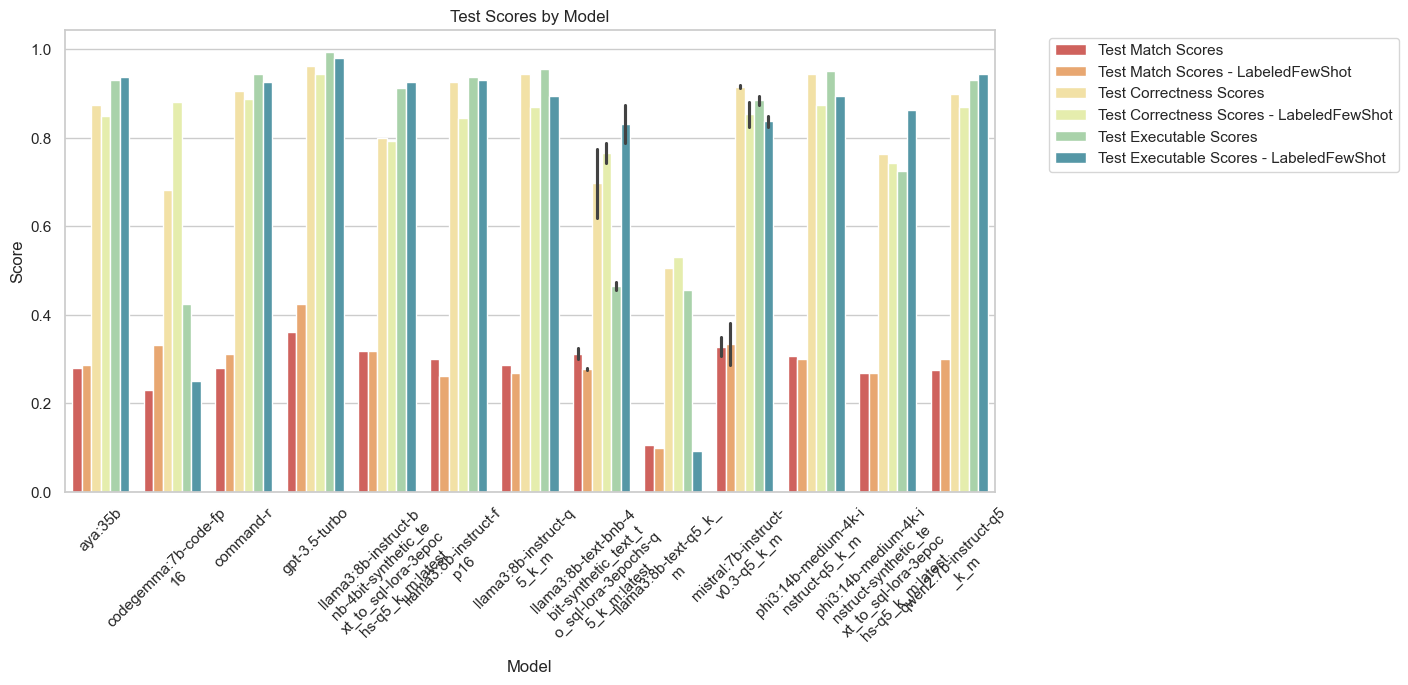

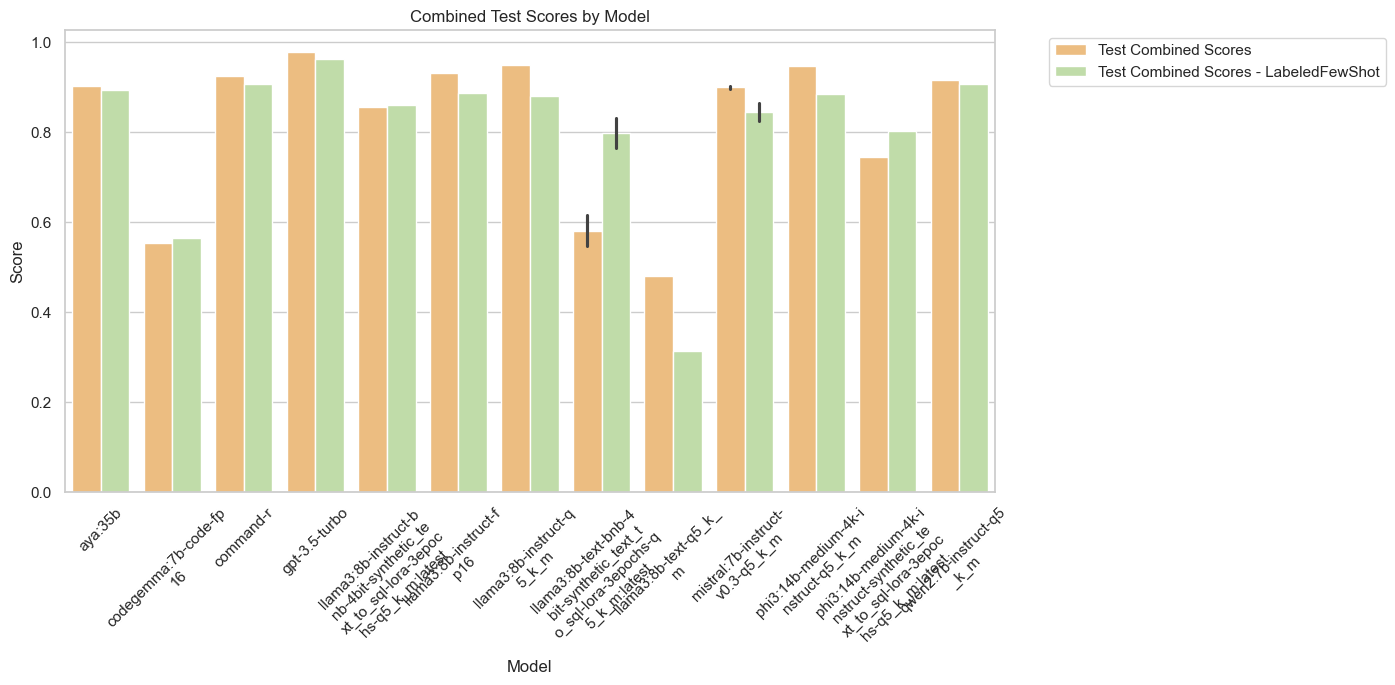

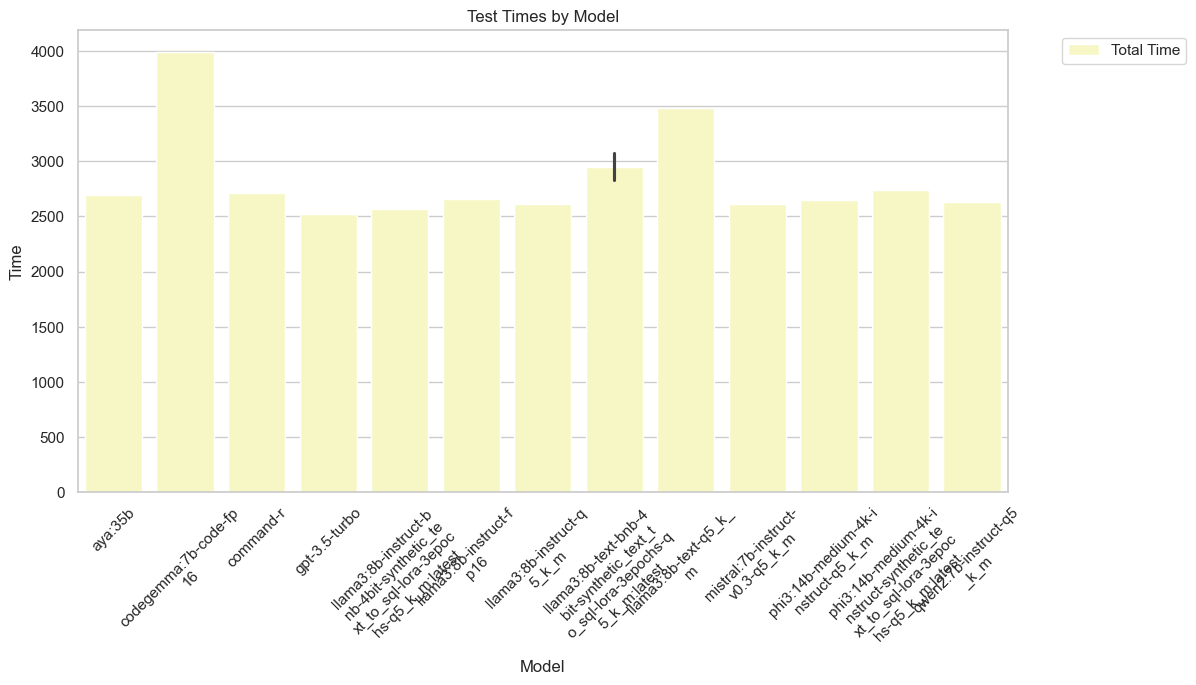

In [63]:
# Set seaborn style for the plots
sns.set(style='whitegrid')

# Function to create grouped bar plot for scores
def plot_grouped_scores(df, score_columns, title):
    melted_df = df.melt(id_vars=['Model'], value_vars=score_columns, var_name='Score Type', value_name='Score')
    plt.figure(figsize=(12, 6))
    ax = sns.barplot(x='Model', y='Score', hue='Score Type', data=melted_df, palette='Spectral')
    plt.title(title)
    plt.xticks(rotation=45)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()

# Function to create grouped bar plot for times
def plot_grouped_times(df, time_columns, title):
    melted_df = df.melt(id_vars=['Model'], value_vars=time_columns, var_name='Time Type', value_name='Time')
    plt.figure(figsize=(12, 6))
    ax = sns.barplot(x='Model', y='Time', hue='Time Type', data=melted_df, palette='Spectral')
    plt.title(title)
    plt.xticks(rotation=45)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()

# Plot grouped test scores
plot_grouped_scores(df, [
    "Test Match Scores", "Test Match Scores - LabeledFewShot", 
    "Test Correctness Scores", "Test Correctness Scores - LabeledFewShot",
    "Test Executable Scores", "Test Executable Scores - LabeledFewShot", 
], 'Test Scores by Model')

plot_grouped_scores(df, [
    "Test Combined Scores", "Test Combined Scores - LabeledFewShot", 
], 'Combined Test Scores by Model')

# Plot grouped test times
plot_grouped_times(df, [
    "Total Time"
], 'Test Times by Model')


C:\Users\Felix\AppData\Local\Temp\ipykernel_18964\1657091205.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='Number of Samples', data=df, palette='coolwarm')


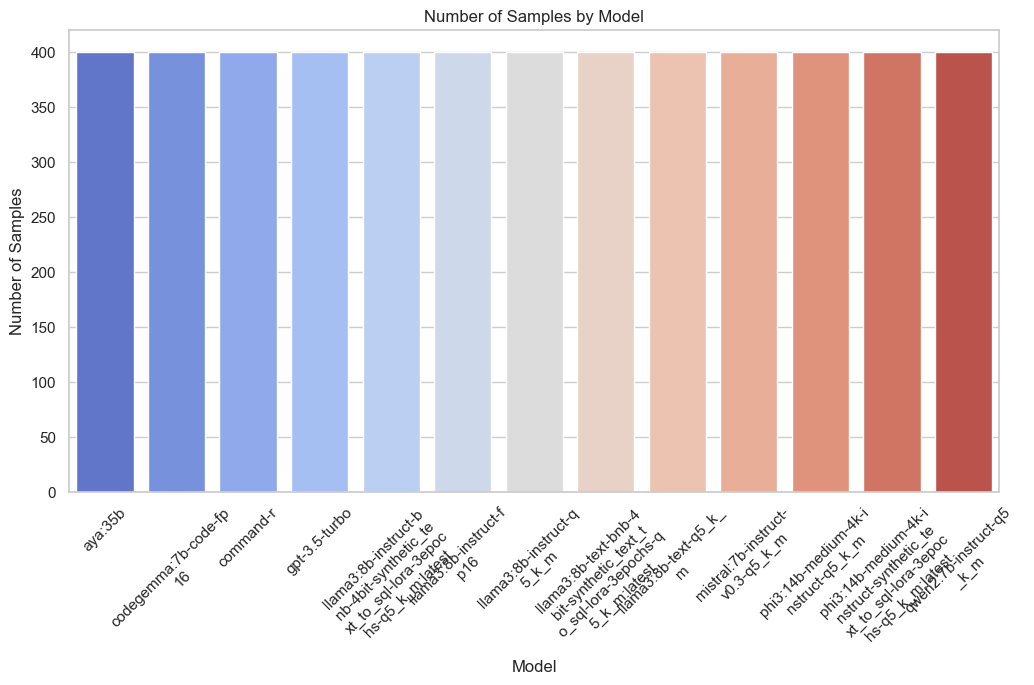

C:\Users\Felix\AppData\Local\Temp\ipykernel_18964\1657091205.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Random Seed', data=df, palette='tab10')


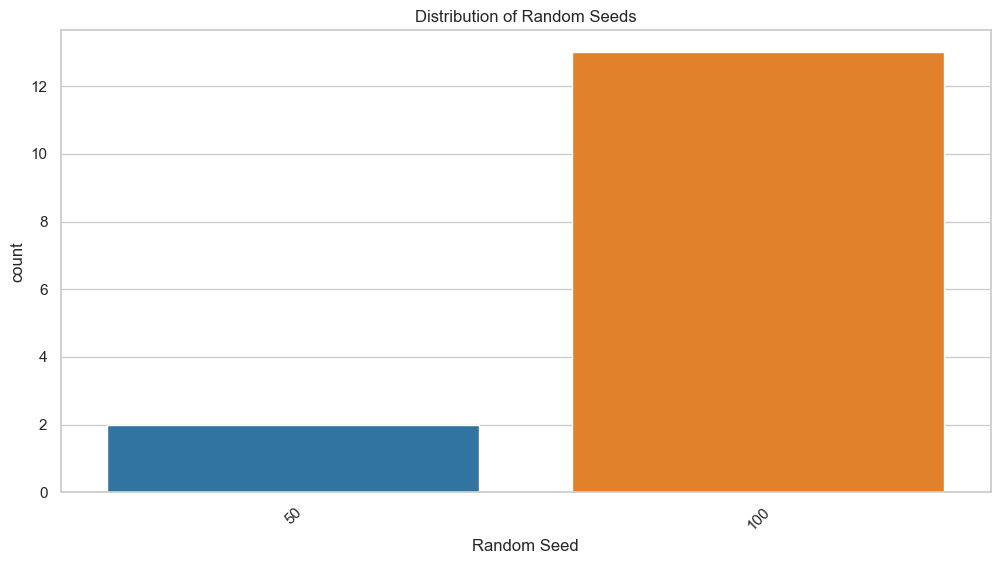

In [64]:
# Additional functions for further analysis

# Function to plot number of samples by model
def plot_samples(df):
    plt.figure(figsize=(12, 6))
    sns.barplot(x='Model', y='Number of Samples', data=df, palette='coolwarm')
    plt.title('Number of Samples by Model')
    plt.xticks(rotation=45)
    plt.show()

# Function to plot random seed distribution
def plot_random_seed(df):
    plt.figure(figsize=(12, 6))
    sns.countplot(x='Random Seed', data=df, palette='tab10')
    plt.title('Distribution of Random Seeds')
    plt.xticks(rotation=45)
    plt.show()

# Plot number of samples and random seed distribution
plot_samples(df)
plot_random_seed(df)

# # Function to plot comparison of candidate programs in FewShot methods
# def plot_candidate_programs(df):
#     plt.figure(figsize=(12, 6))
#     sns.barplot(x='Model', y='Number of candidate programs - LabeledFewShot', data=df, palette='spring', label='LabeledFewShot')
#     sns.barplot(x='Model', y='Number of candidate programs - BootstrapFewShot', data=df, palette='summer', label='BootstrapFewShot')
#     plt.title('Number of Candidate Programs by Model')
#     plt.xticks(rotation=45)
#     plt.legend()
#     plt.show()

# # Plot candidate programs comparison
# plot_candidate_programs(df)

In [65]:
# # Ensure the correct column names are used
# test_score_columns = [
#     "Test Match Scores", 
#     "Test Match Scores - LabeledFewShot", 
#     "Test Match Scores - BootstrapFewShot"
# ]

# # Calculate the mean performance for each score type
# mean_test_scores = df[test_score_columns].mean(axis=0)

# # Normalize the scores by subtracting the mean score
# df['Normalized Test Scores'] = df['Test Match Scores'] - mean_test_scores['Test Match Scores']
# df['Normalized Test Scores - LabeledFewShot'] = df['Test Match Scores - LabeledFewShot'] - mean_test_scores['Test Match Scores - LabeledFewShot']
# df['Normalized Test Scores - BootstrapFewShot'] = df['Test Match Scores - BootstrapFewShot'] - mean_test_scores['Test Match Scores - BootstrapFewShot']

# # Function to create grouped bar plot for scores
# def plot_grouped_scores(df, score_columns, title):
#     melted_df = df.melt(id_vars=['Model'], value_vars=score_columns, var_name='Score Type', value_name='Score')
#     plt.figure(figsize=(12, 6))
#     ax = sns.barplot(x='Model', y='Score', hue='Score Type', data=melted_df, palette='Spectral')
#     plt.title(title)
#     plt.xticks(rotation=45)
#     plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
#     plt.show()

# # Function to create grouped bar plot for times
# def plot_grouped_times(df, time_columns, title):
#     melted_df = df.melt(id_vars=['Model'], value_vars=time_columns, var_name='Time Type', value_name='Time')
#     plt.figure(figsize=(12, 6))
#     ax = sns.barplot(x='Model', y='Time', hue='Time Type', data=melted_df, palette='Spectral')
#     plt.title(title)
#     plt.xticks(rotation=45)
#     plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
#     plt.show()

# # Plot grouped normalized test scores
# plot_grouped_scores(df, [
#     'Normalized Test Scores', 
#     'Normalized Test Scores - LabeledFewShot', 
#     'Normalized Test Scores - BootstrapFewShot'
# ], 'Normalized Test Scores by Model')


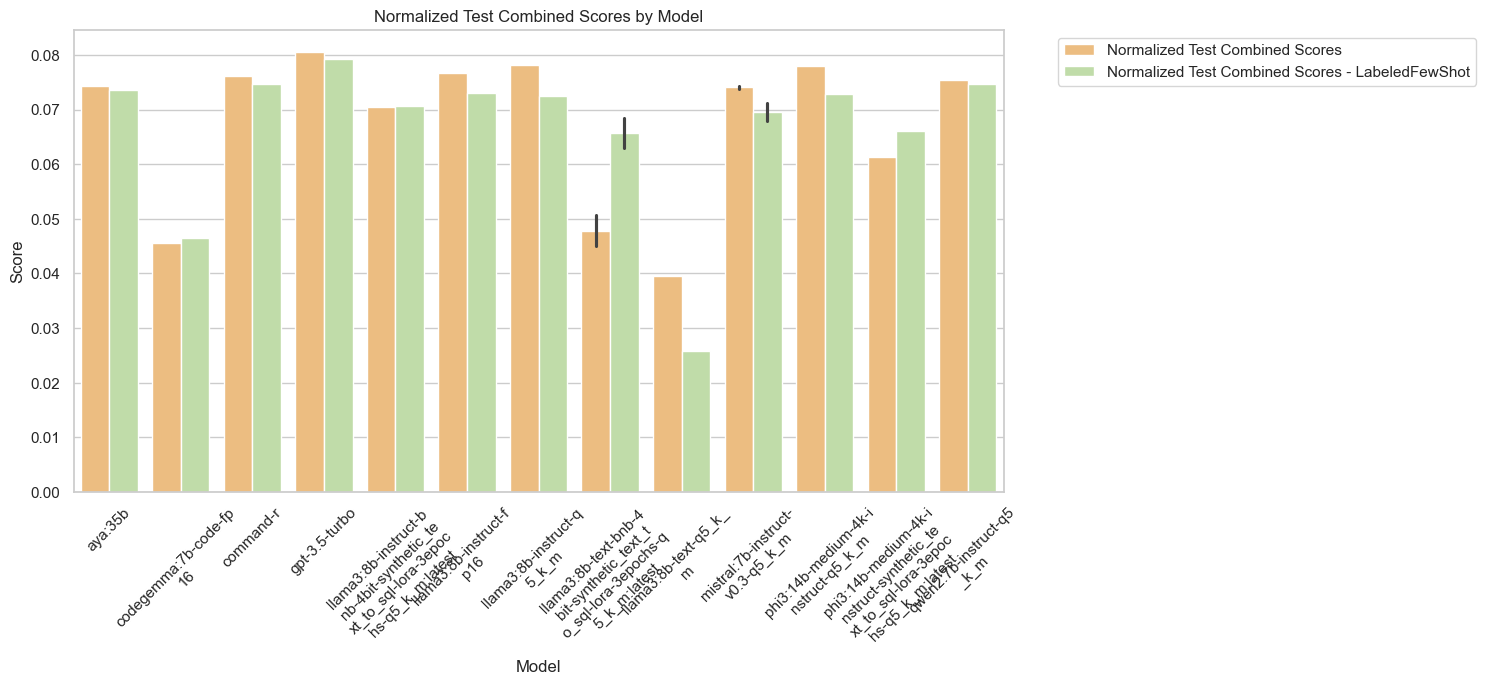

In [66]:
# Calculate the sum of each score type
sum_test_scores = df[['Test Combined Scores', 'Test Combined Scores - LabeledFewShot']].sum(axis=0)

# Normalize the scores by dividing by the sum
df['Normalized Test Combined Scores'] = df['Test Combined Scores'] / sum_test_scores['Test Combined Scores']
df['Normalized Test Combined Scores - LabeledFewShot'] = df['Test Combined Scores - LabeledFewShot'] / sum_test_scores['Test Combined Scores - LabeledFewShot']

# Plot grouped normalized test scores
plot_grouped_scores(df, [
    'Normalized Test Combined Scores', 
    'Normalized Test Combined Scores - LabeledFewShot'], 
    'Normalized Test Combined Scores by Model')

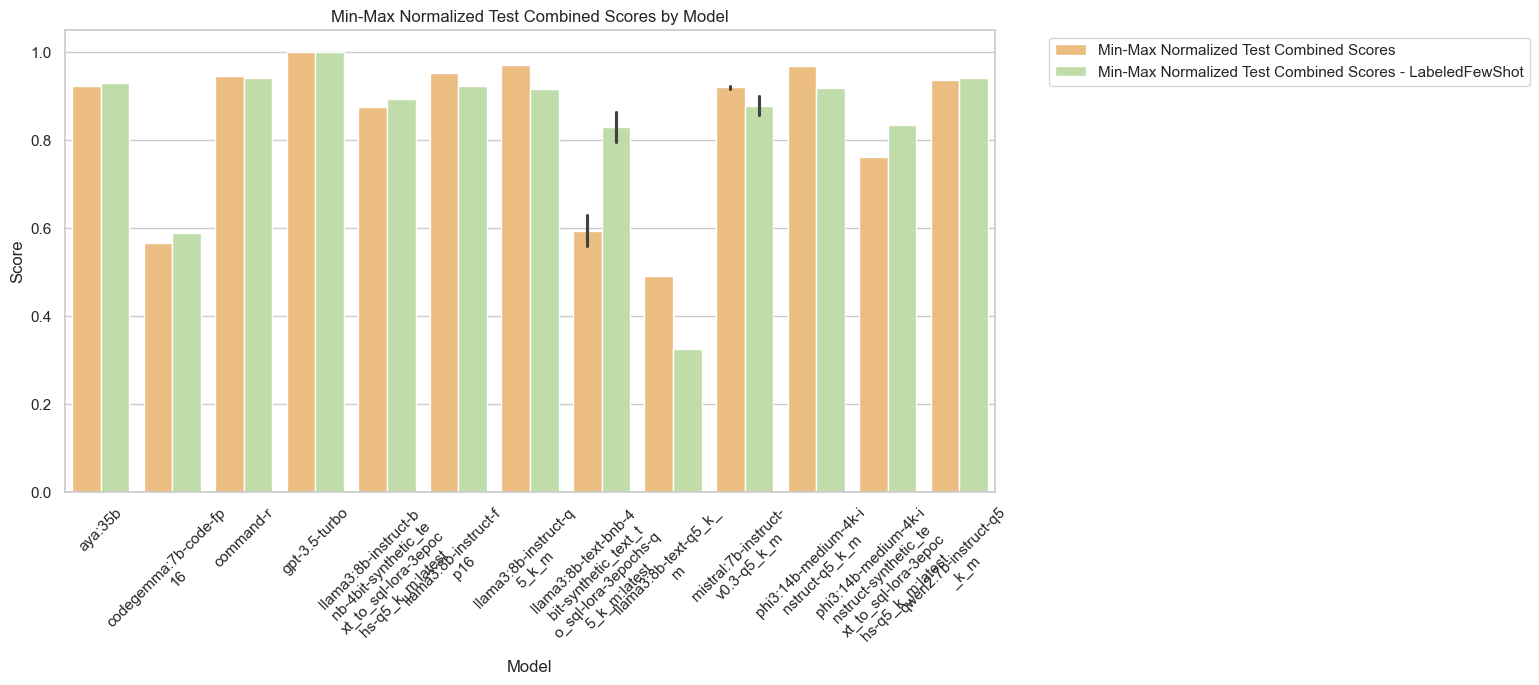

In [67]:
# Calculate the maximum value for each score type
max_test_scores = df[['Test Combined Scores', 'Test Combined Scores - LabeledFewShot']].max(axis=0)

# Normalize the scores by dividing by the maximum value
df['Min-Max Normalized Test Combined Scores'] = df['Test Combined Scores'] / max_test_scores['Test Combined Scores']
df['Min-Max Normalized Test Combined Scores - LabeledFewShot'] = df['Test Combined Scores - LabeledFewShot'] / max_test_scores['Test Combined Scores - LabeledFewShot']

# Plot min-max normalized test scores
plot_grouped_scores(df, ['Min-Max Normalized Test Combined Scores', 'Min-Max Normalized Test Combined Scores - LabeledFewShot'], 'Min-Max Normalized Test Combined Scores by Model')


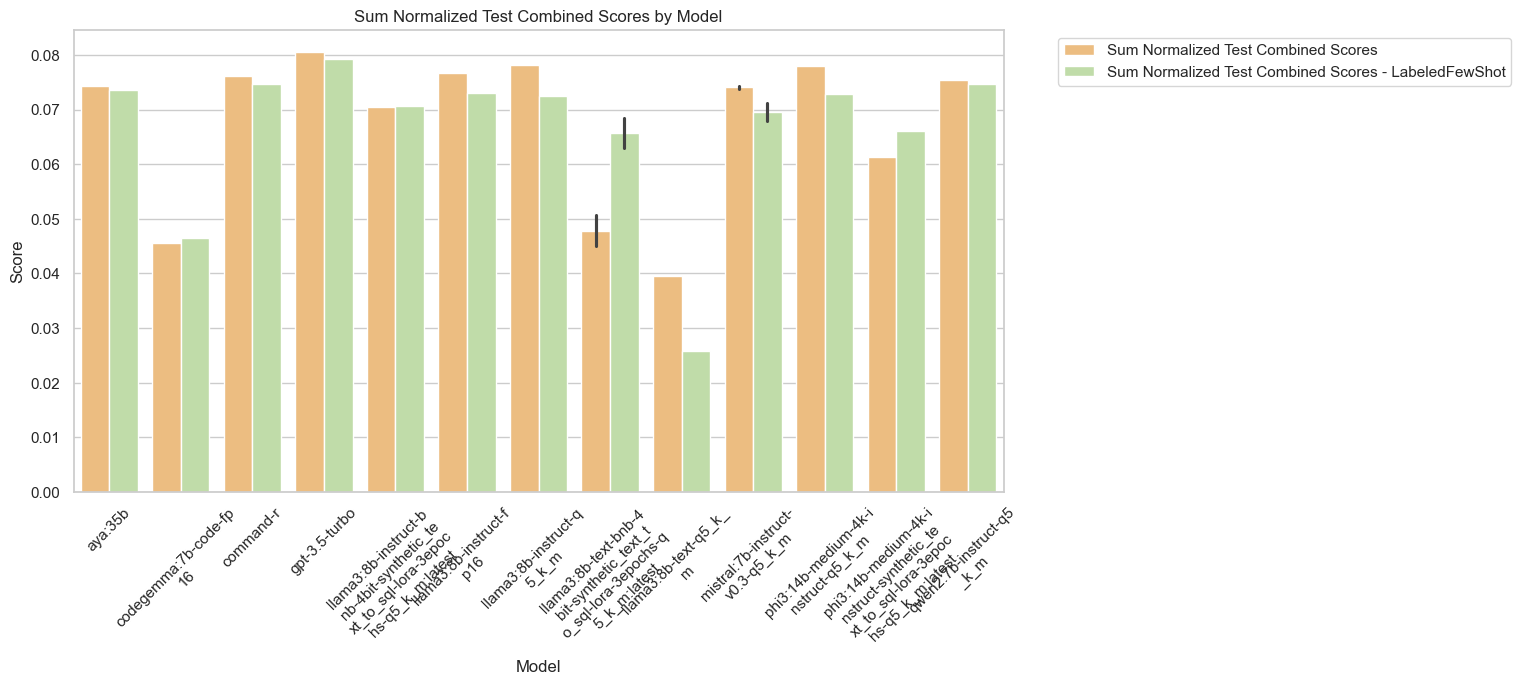

In [68]:
# Calculate the sum of each score type
sum_test_scores = df[['Test Combined Scores', 'Test Combined Scores - LabeledFewShot']].sum(axis=0)

# Normalize the scores by dividing by the sum
df['Sum Normalized Test Combined Scores'] = df['Test Combined Scores'] / sum_test_scores['Test Combined Scores']
df['Sum Normalized Test Combined Scores - LabeledFewShot'] = df['Test Combined Scores - LabeledFewShot'] / sum_test_scores['Test Combined Scores - LabeledFewShot']


# Plot sum normalized test scores
plot_grouped_scores(df, ['Sum Normalized Test Combined Scores', 'Sum Normalized Test Combined Scores - LabeledFewShot', ], 'Sum Normalized Test Combined Scores by Model')


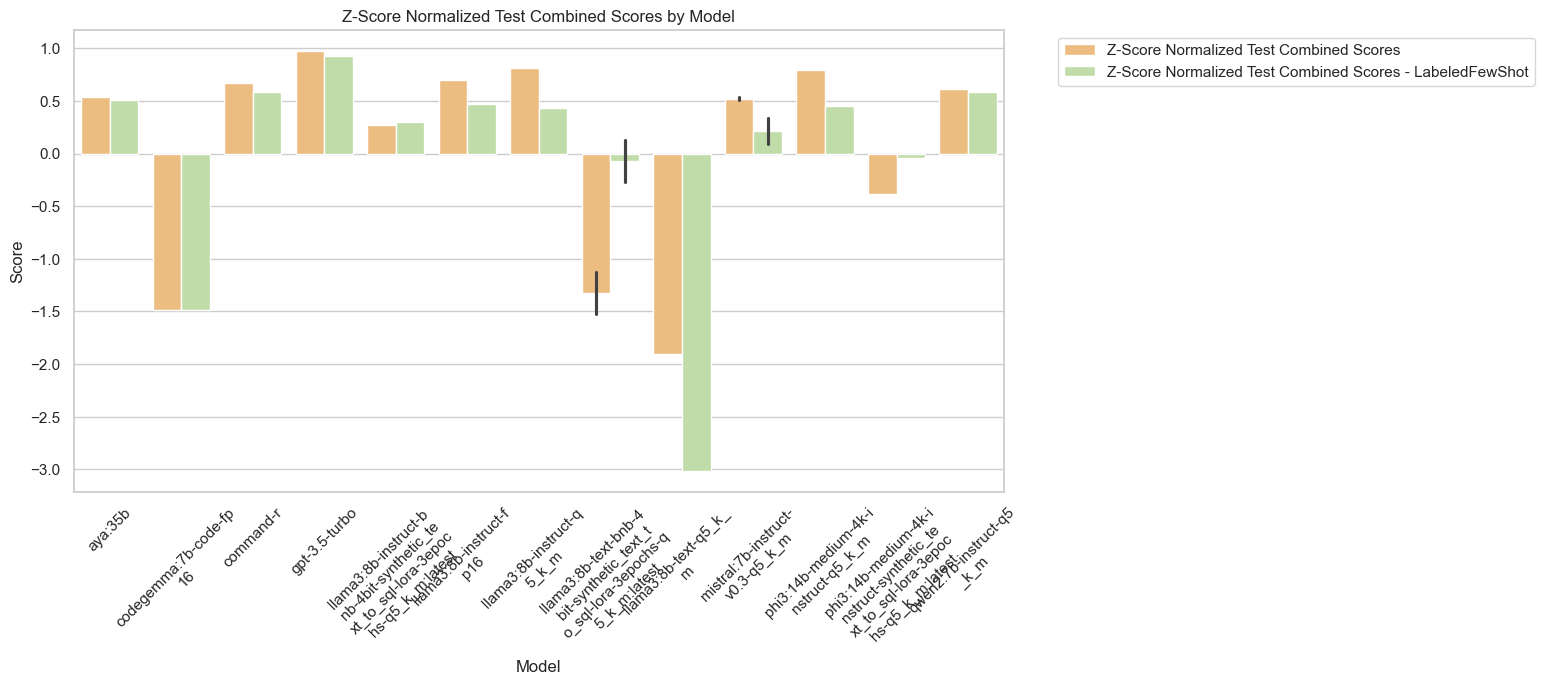

In [69]:
# Calculate the mean and standard deviation for each score type
mean_test_scores = df[['Test Combined Scores', 'Test Combined Scores - LabeledFewShot', ]].mean(axis=0)
std_test_scores = df[['Test Combined Scores', 'Test Combined Scores - LabeledFewShot', ]].std(axis=0)

# Normalize the scores using z-score
df['Z-Score Normalized Test Combined Scores'] = (df['Test Combined Scores'] - mean_test_scores['Test Combined Scores']) / std_test_scores['Test Combined Scores']
df['Z-Score Normalized Test Combined Scores - LabeledFewShot'] = (df['Test Combined Scores - LabeledFewShot'] - mean_test_scores['Test Combined Scores - LabeledFewShot']) / std_test_scores['Test Combined Scores - LabeledFewShot']


# Plot z-score normalized test scores
plot_grouped_scores(df, ['Z-Score Normalized Test Combined Scores', 'Z-Score Normalized Test Combined Scores - LabeledFewShot', ], 'Z-Score Normalized Test Combined Scores by Model')


In [70]:
# only select random seed == 1
# df = df[df['Random Seed'] == 1]

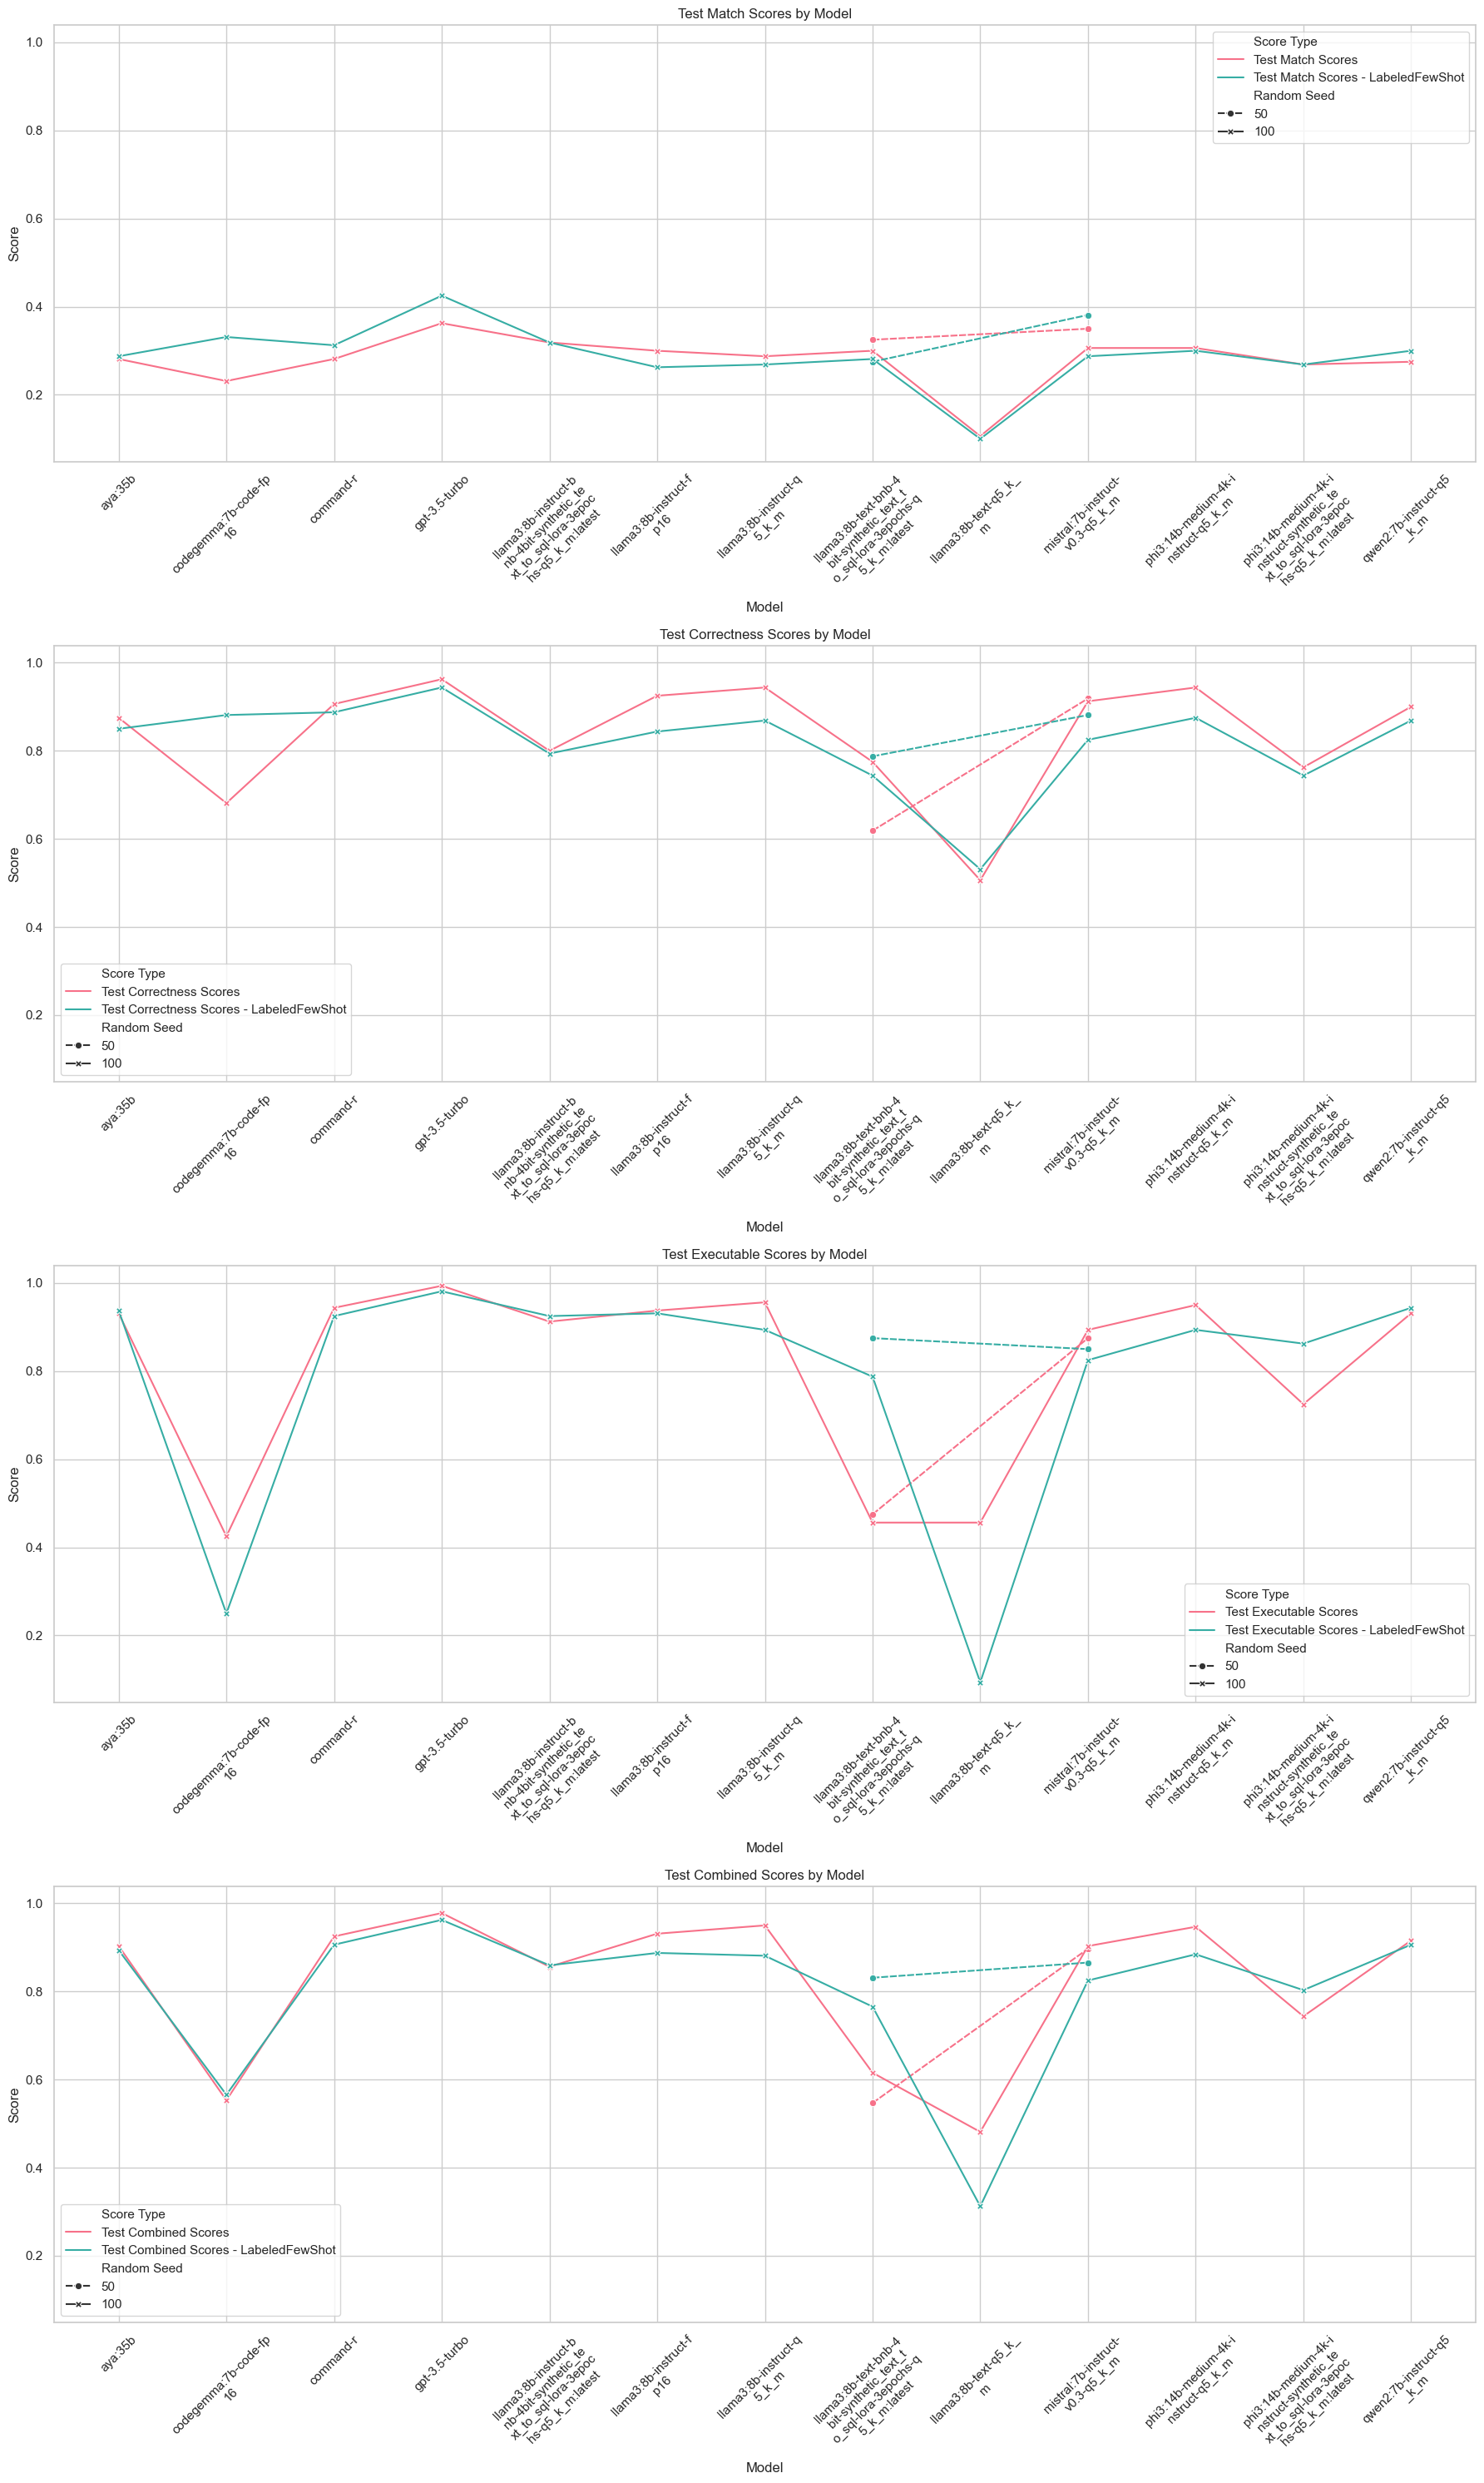

In [71]:
# Set seaborn style for the plots
sns.set(style='whitegrid')

# Function to create line plots for different score types
def plot_scores(df, score_columns, title, ax):
    melted_df = df.melt(id_vars=['Model', 'Random Seed'], value_vars=score_columns, var_name='Score Type', value_name='Score')
    sns.lineplot(data=melted_df, x='Model', y='Score', hue='Score Type', style='Random Seed', markers=True, dashes=dashes_dict, palette=palette, ax=ax)
    ax.set_title(title)
    ax.set_xlabel('Model')
    ax.set_ylabel('Score')
    ax.tick_params(axis='x', rotation=45)


# Define a dashes dictionary for the random seeds
unique_seeds = df['Random Seed'].unique()
dashes_dict = {seed: ((i+1)*2, 1*i) for i, seed in enumerate(unique_seeds)}

# Define a color palette
palette = sns.color_palette("husl", len(df['Random Seed'].unique()))

# Create subplots
fig, axs = plt.subplots(4, 1, figsize=(18, 30), sharey=True)


# Plot test match scores
plot_scores(df, ['Test Match Scores', 'Test Match Scores - LabeledFewShot'], 'Test Match Scores by Model', axs[0])

# Plot test correctness scores
plot_scores(df, ['Test Correctness Scores', 'Test Correctness Scores - LabeledFewShot'], 'Test Correctness Scores by Model', axs[1])


# Plot test executable scores
plot_scores(df, [
    'Test Executable Scores', 
    'Test Executable Scores - LabeledFewShot', 
], 'Test Executable Scores by Model', axs[2])

# Plot test combined scores
plot_scores(df, [
    'Test Combined Scores', 
    'Test Combined Scores - LabeledFewShot', 
], 'Test Combined Scores by Model', axs[3])

# Adjust layout
plt.tight_layout()
plt.show()

C:\Users\Felix\AppData\Local\Temp\ipykernel_18964\1470155301.py:7: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  sns.lineplot(data=melted_df, x='Model', y='Score', hue='Score Type', style='Score Type', markers=True, dashes=dashes_dict, palette=palette, ax=ax)
C:\Users\Felix\AppData\Local\Temp\ipykernel_18964\1470155301.py:7: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  sns.lineplot(data=melted_df, x='Model', y='Score', hue='Score Type', style='Score Type', markers=True, dashes=dashes_dict, palette=palette, ax=ax)
C:\Users\Felix\AppData\Local\Temp\ipykernel_18964\1470155301.py:7: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  sns.lineplot(data=melted_df, x='Model', y='Score', hue='Score Type', style='Score Type', markers=True, dashes=dashes_dict, palette=palette, ax=ax)
C:\Users\Felix\AppData\Local\Temp\ipykernel_18964\1470155301.py:7: Use

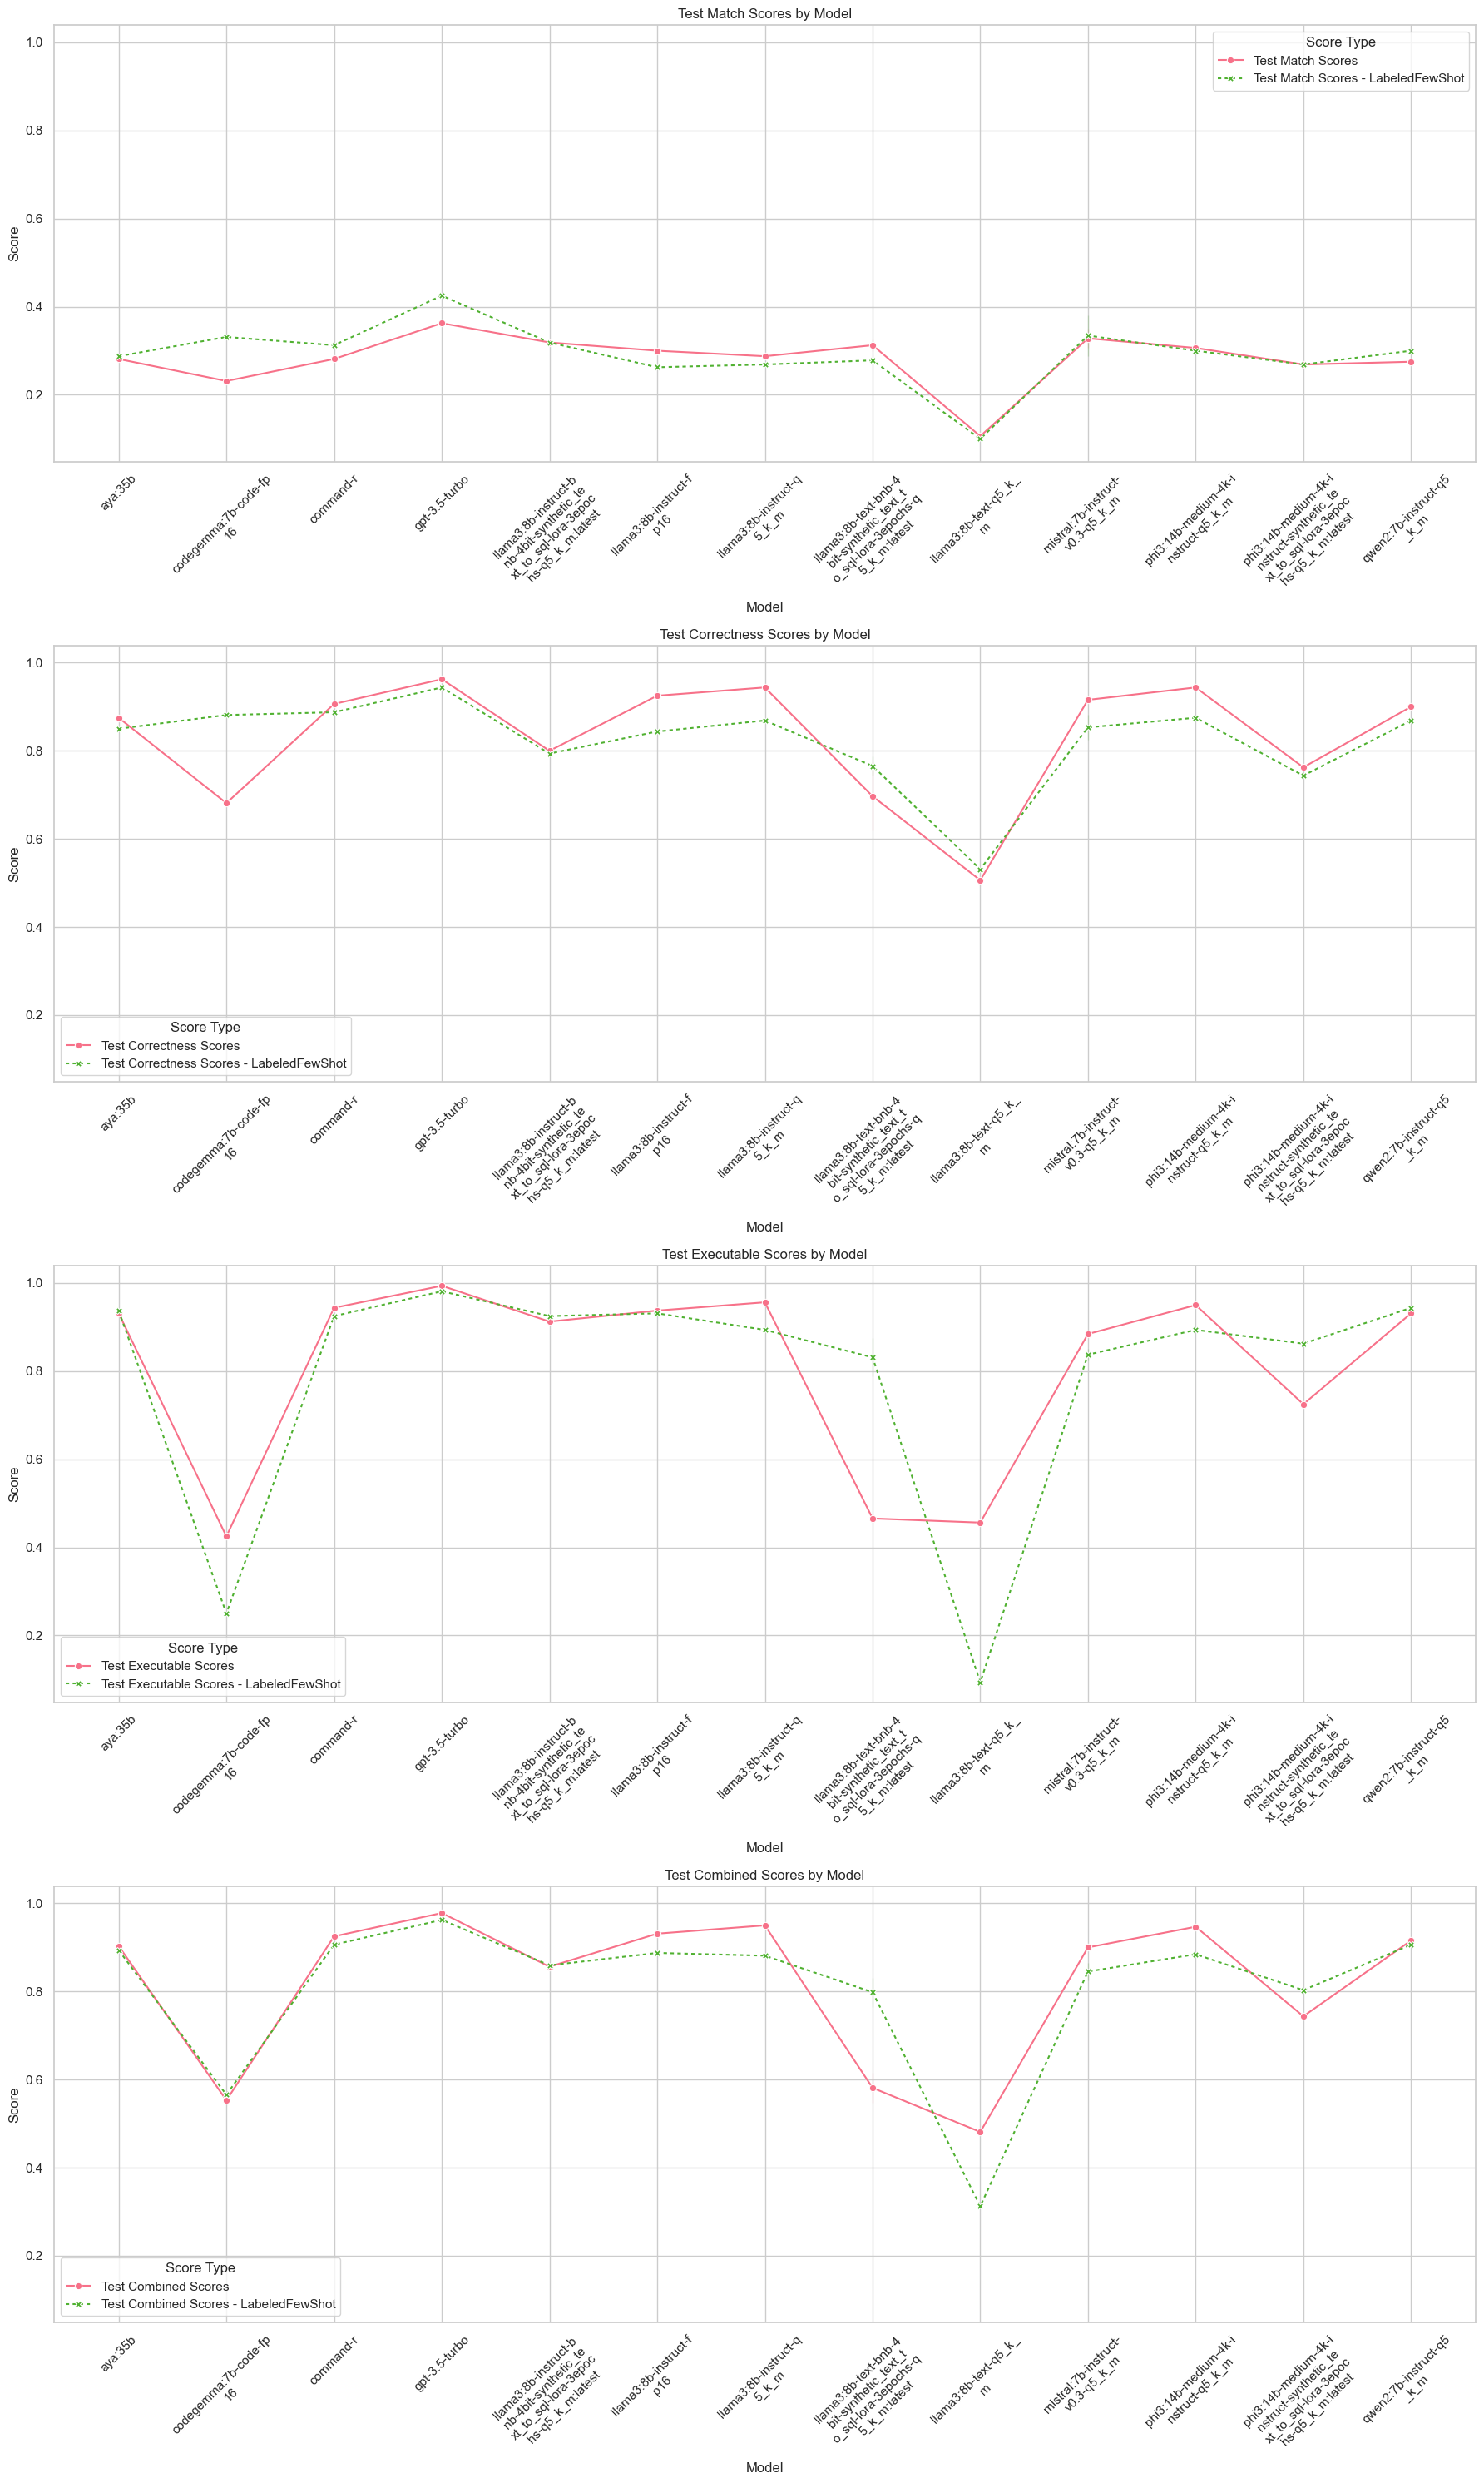

In [72]:
# Set seaborn style for the plots
sns.set(style='whitegrid')

# Function to create line plots for different score types
def plot_scores(df, score_columns, title, ax):
    melted_df = df.melt(id_vars=['Model', 'Random Seed'], value_vars=score_columns, var_name='Score Type', value_name='Score')
    sns.lineplot(data=melted_df, x='Model', y='Score', hue='Score Type', style='Score Type', markers=True, dashes=dashes_dict, palette=palette, ax=ax)
    ax.set_title(title)
    ax.set_xlabel('Model')
    ax.set_ylabel('Score')
    ax.tick_params(axis='x', rotation=45)

# Get unique values for random seeds and score types
unique_seeds = df['Random Seed'].unique()
score_columns = [
    'Test Match Scores', 'Test Match Scores - LabeledFewShot',
    'Test Correctness Scores', 'Test Correctness Scores - LabeledFewShot', 
    'Test Executable Scores', 'Test Executable Scores - LabeledFewShot', 
    'Test Combined Scores', 'Test Combined Scores - LabeledFewShot', 
]

# Define a fixed color palette for the random seeds
palette = sns.color_palette("husl", 3)

# Define a dashes dictionary for the score types
dashes_dict = {
    'Test Match Scores': (1, 0),
    'Test Match Scores - LabeledFewShot': (2, 2),
    'Test Correctness Scores': (1, 0),
    'Test Correctness Scores - LabeledFewShot': (2, 2),
    'Test Executable Scores': (1, 0),
    'Test Executable Scores - LabeledFewShot': (2, 2),
    'Test Combined Scores': (1, 0),
    'Test Combined Scores - LabeledFewShot': (2, 2),
}

# Create subplots
fig, axs = plt.subplots(4, 1, figsize=(18, 30), sharey=True)

# Plot test match scores
plot_scores(df, ['Test Match Scores', 'Test Match Scores - LabeledFewShot',], 'Test Match Scores by Model', axs[0])

# Plot test correctness scores
plot_scores(df, ['Test Correctness Scores', 'Test Correctness Scores - LabeledFewShot',], 'Test Correctness Scores by Model', axs[1])

# Plot test executable scores
plot_scores(df, ['Test Executable Scores', 'Test Executable Scores - LabeledFewShot', ], 'Test Executable Scores by Model', axs[2])

# Plot test combined scores
plot_scores(df, ['Test Combined Scores', 'Test Combined Scores - LabeledFewShot', ], 'Test Combined Scores by Model', axs[3])

# Adjust layout
plt.tight_layout()
plt.show()